In [30]:
using CairoMakie, LinearAlgebra, NAJ, FileIO
using LoopVectorization

In [2]:
m_n = m_p = 1.67e-27
G=6.6710e-11
k=8.998e9
e=1.602e-19;

In [3]:
(G*m_n^2)/(k * e^2)

8.056619823893886e-37

In [4]:
k*e^2/(1.0e-15)^2

230.92503191999998

In [5]:
function f(y)
    P1 = [0, 1]
    P2 = [-√3/2, -1/2]
    P3 = [√3/2, -1/2] 
    P = [0, y]
    return 1/(norm(P .- P1))^2 - ((P.-P2)[2])/(norm(P .- P2)^3) -  ((P.-P3)[2])/(norm(P .- P3)^3)
end
g(y) = -(y-1)/(abs(y-1)^3) + 2*(y+0.5)/((3/4 + (y+0.5)^2)^1.5)

g (generic function with 1 method)

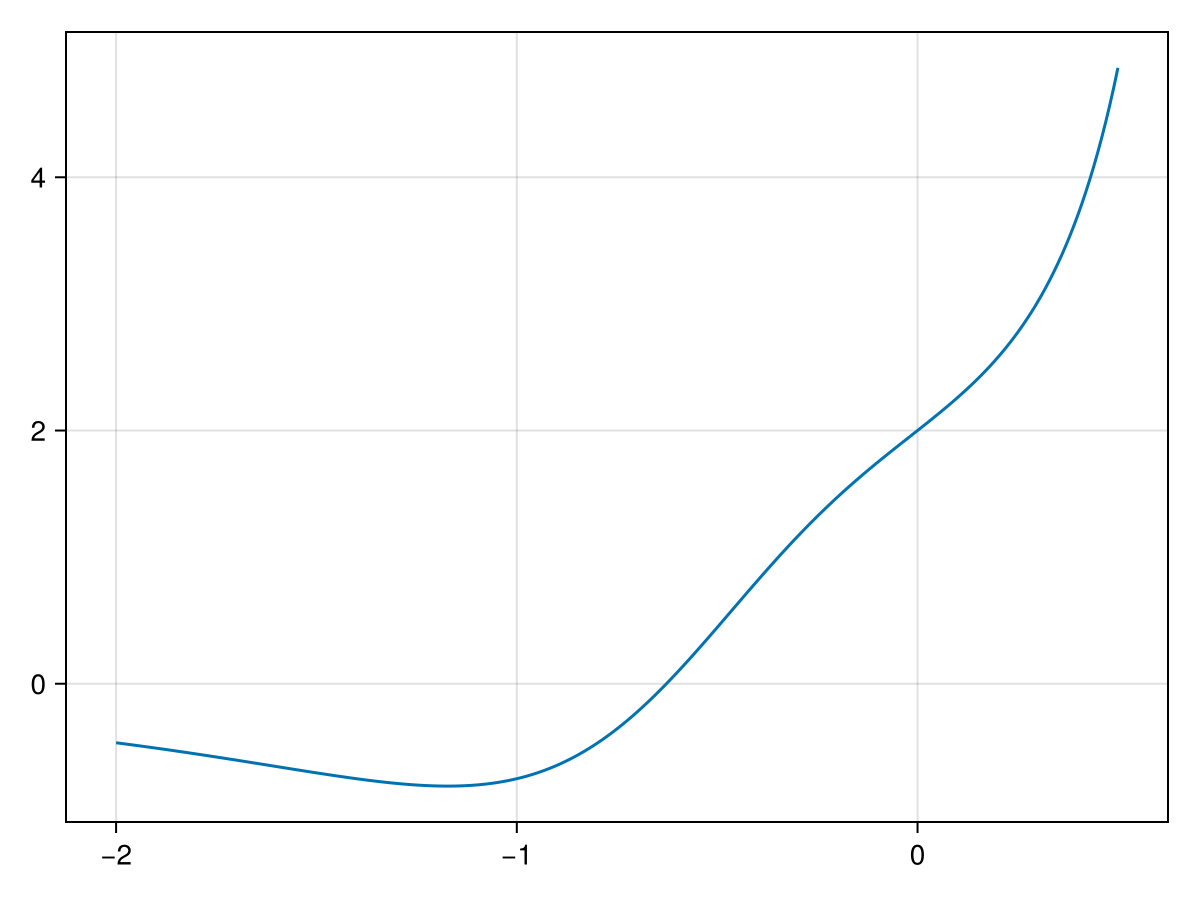

In [6]:
y =  -2:0.01:0.5
fig= Figure()
ax = Axis(fig[1, 1])
# lines!(ax, y, f.(y))
lines!(ax, y, g.(y))
fig

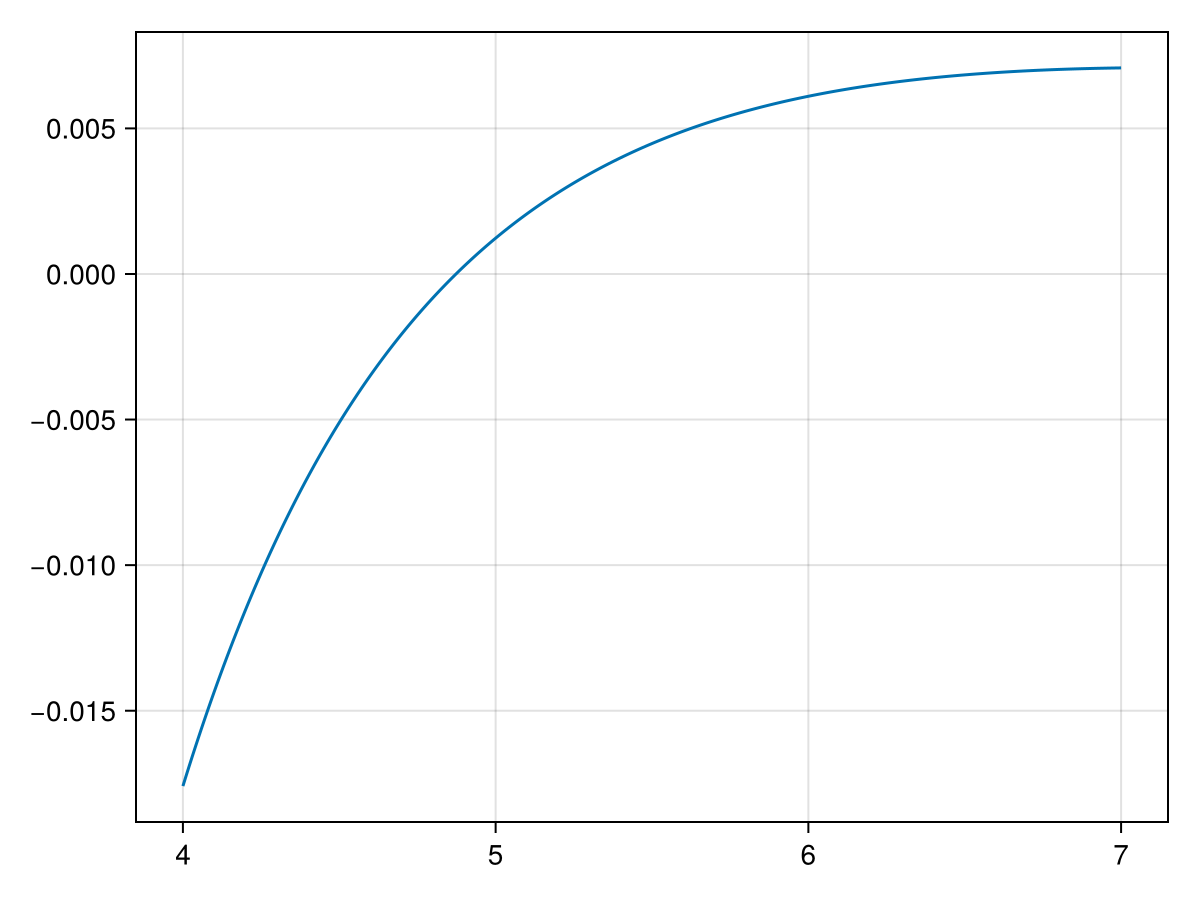

In [7]:
y =  4:0.01:7
fig= Figure()
ax = Axis(fig[1, 1])
# lines!(ax, y, f.(y))
lines!(ax, y, g.(y))
fig

In [8]:
rootfinding_bisection(g, 4, 6)

(4.873241390322832, 47)

In [9]:
4.4724*2/sqrt(3)

5.164282687847365

In [23]:
function calc_potential_per_ion(M::Integer)
    U = 0.0
    for i in -M:1:M, j ∈ -M:1:M
        if (i, j) == (0, 0)
            U += 0
        elseif iseven(i+j)
            U += 1/sqrt(i^2+j^2)/2
        else 
            U -=1/sqrt(i^2+j^2)/2
        end
    end
    return U
end

M = [1, 3, 5, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 50000]
P = calc_potential_per_ion.(M)


13-element Vector{Float64}:
 -0.5857864376269051
 -0.7072855126989305
 -0.7436222379163143
 -0.7741186716480258
 -0.8007704277030607
 -0.8042533909405954
 -0.8060079575413927
 -0.8070649131519267
 -0.8074179366762397
 -0.8075945808467639
 -0.807700609747406
 -0.80773595978062
 -0.8077642423620823

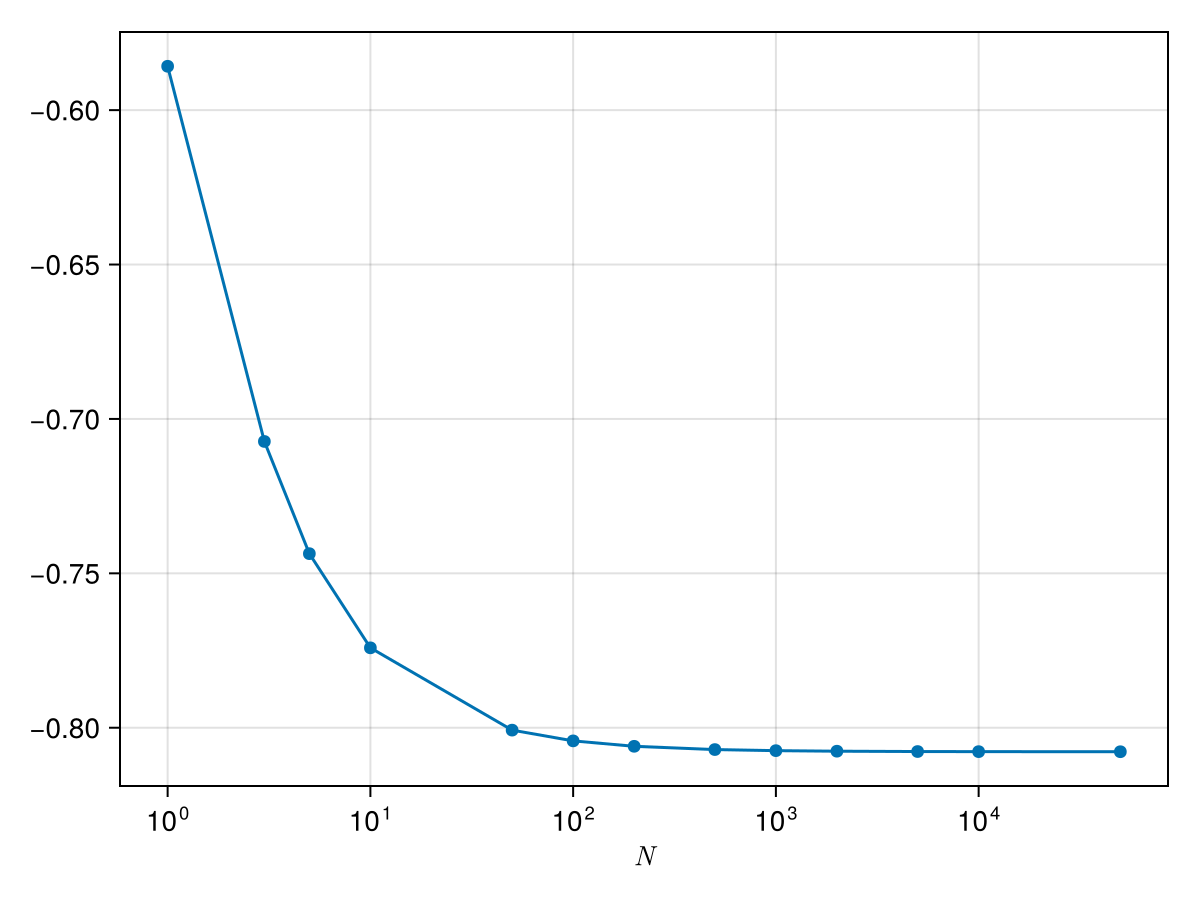

In [29]:

fig= Figure()
ax = Axis(fig[1, 1], xscale = log10, xlabel = L"N")
# lines!(ax, y, f.(y))
scatterlines!(ax, M, P )
fig


In [34]:
save("../images/Electromagnetism/electrostatics/exr_purcell_1_7/result.png", fig)

CairoMakie.Screen{IMAGE}


In [17]:
sum([((-1)^m)/m for m in 1:1000])  + sum([((-1)^(m+n))/sqrt(m^2+n^2) for n in -1000:1:1000 for m in 1:1000])

-0.8074179366762374

In [32]:
pwd()

"/Users/jiyongso/Documents/Projects/ClassicalMechanics/src/Electromagnetism"